In [21]:
import pandas as pd
import numpy as np

In [48]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

In [8]:
df = pd.read_excel('XWOBACON.xlsx')

In [36]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.45)

In [44]:
plt.xkcd()

In [46]:
plot_df = df[df.Team != 'MLB'].sort_values('WOBACON', ascending=False)

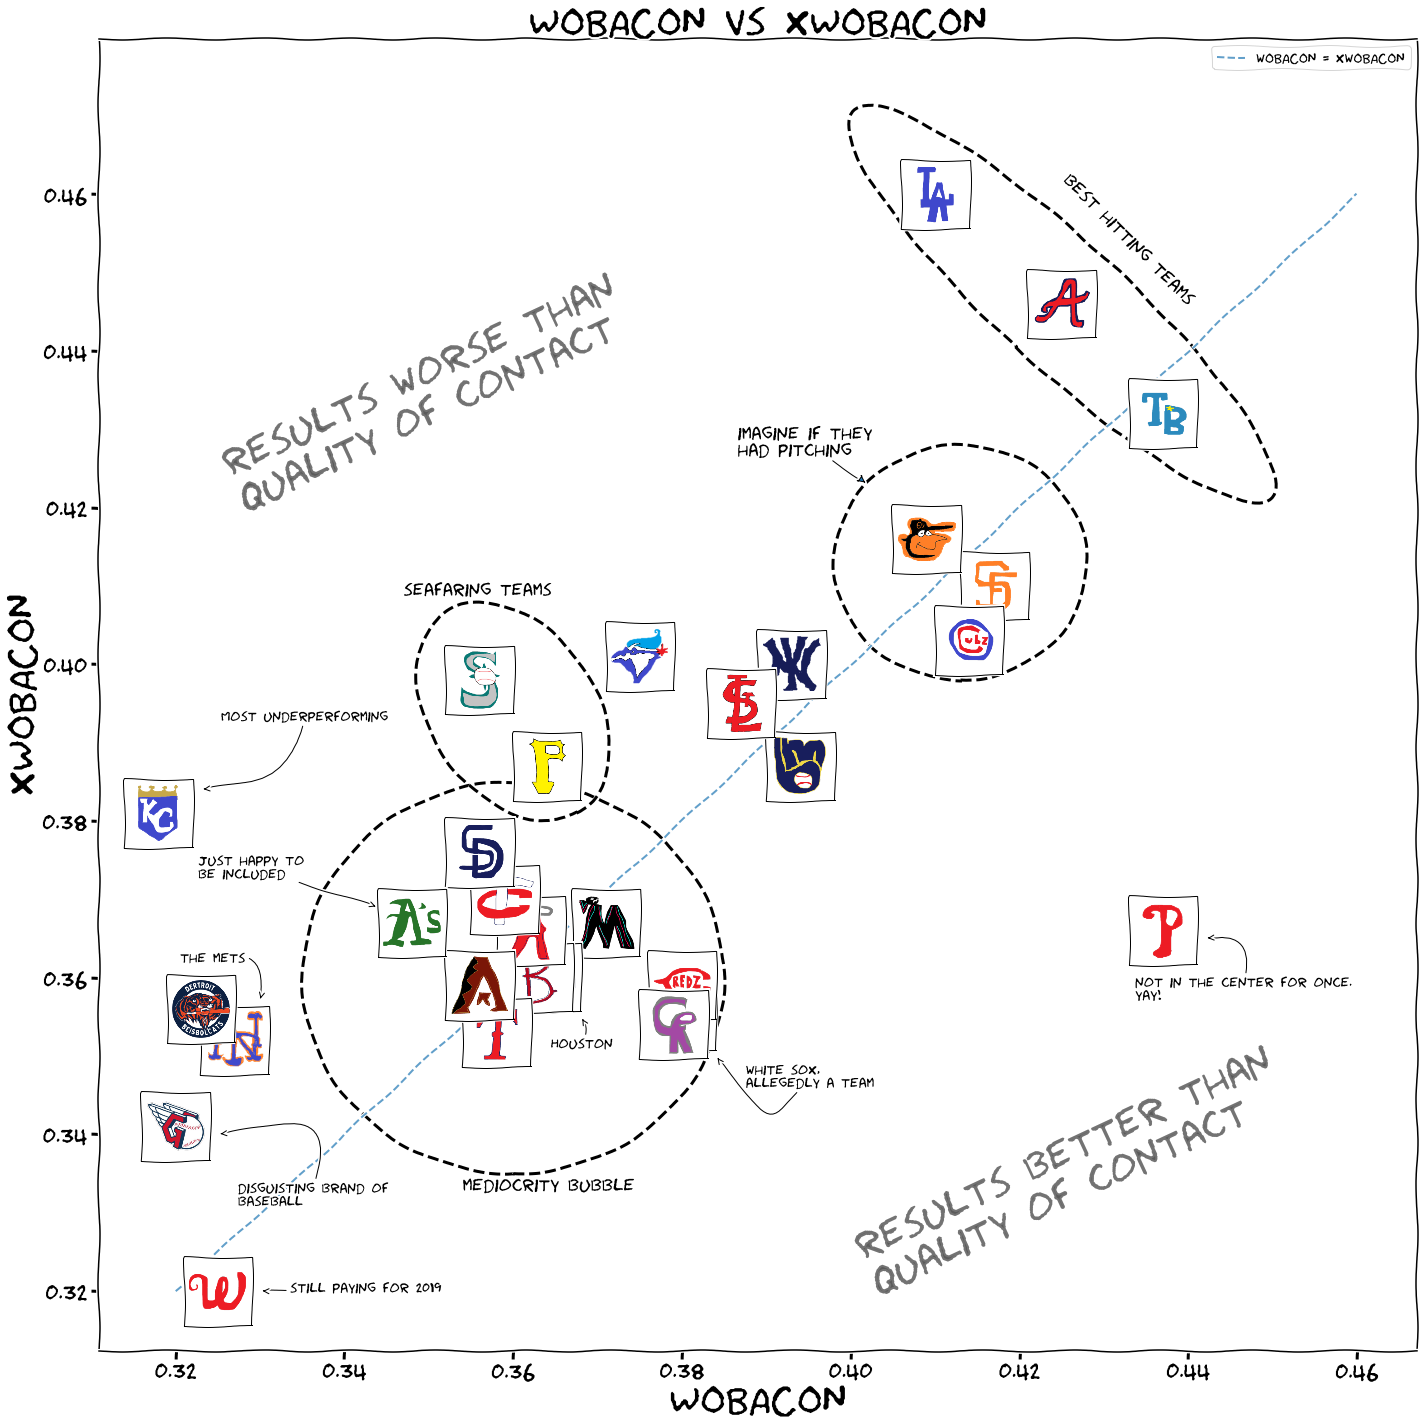

In [153]:
f, ax = plt.subplots(figsize=(20,20))

ax.scatter(plot_df.WOBACON, plot_df.XWOBACON)


imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm.Team}.png'),
                      (tm.WOBACON, tm.XWOBACON),
                       frameon=True
                      )
    )
    for tm in plot_df.itertuples()
]


# add best hitting teams
ax.add_patch(Ellipse((0.425,0.446), 0.07, 0.0155, -45, fill=False, ls="--", lw=3))
ax.annotate("best hitting teams",
            (.425,.446), rotation=-45    ,size=18)

# add imagine if they had pitching
ax.add_patch(Ellipse((0.413,0.413), 0.03, 0.03, 0 , fill=False, ls="--", lw=3))
ax.annotate(
        "imagine if they\nhad pitching",
        (.402,.423), 
        rotation=0,
        xytext = (-130, 30),
        textcoords="offset pixels",
        arrowprops=dict(arrowstyle='-|>')    ,size=18
)

# add mediocrity bubble
ax.add_patch(Ellipse((0.36,0.36), 0.05, 0.05, 0 , fill=False, ls="--", lw=3))
ax.annotate("mediocrity bubble",
            (.354,.333)    ,size=18)




# add Houston
ax.annotate(
        "Houston",
        (.368,.355), 
        rotation=0,
        xytext = (-30, -30),
        textcoords="offset pixels",
        arrowprops=dict(arrowstyle='->',connectionstyle = "angle, angleA = 50, angleB = 130, rad=20")
)


# add Whitesox
ax.annotate(
        "white sox,\nallegedly a team",
        (.384,.35), 
        rotation=0,
        xytext = (30, -30),
        textcoords="offset pixels",
        arrowprops=dict(arrowstyle='->',connectionstyle = "angle, angleA = 50, angleB = 130, rad=20")
)

# add Phillies
ax.annotate(
        "not in the center for once.\nyay!",
        (.442,.365), 
        rotation=0,
        xytext = (-70, -60),
        textcoords="offset pixels",
        arrowprops=dict(arrowstyle='->',connectionstyle = "angle, angleA = 80, angleB = 10, rad=50")
)

# add Nationals
ax.annotate(
        "still paying for 2019",
        (.33,.32), 
        rotation=0,
        xytext = (30, 0),
        textcoords="offset pixels",
        arrowprops=dict(arrowstyle='->')
)

# add Mets
ax.annotate(
        "the mets",
        (.33,.357), 
        rotation=0,
        xytext = (-80, 40),
        textcoords="offset pixels",
        arrowprops=dict(arrowstyle='->',connectionstyle = "angle, angleA = 10, angleB = 80, rad=50")
)

# add Athletics
ax.annotate(
        "just happy to\nbe included",
        (.344,.369), 
        rotation=0,
        xytext = (-180, 30),
        textcoords="offset pixels",
        arrowprops=dict(arrowstyle='->')
)

# add Guardians
ax.annotate(
        "disguisting brand of\nbaseball",
        (.325, .34), 
        rotation=0,
        xytext = (20, -70),
        textcoords="offset pixels",
        arrowprops=dict(arrowstyle='->',connectionstyle = "angle, angleA = 80, angleB = 10, rad=50")
)

# add Royals
ax.annotate(
        "Most underperforming",
        (.323, .384), 
        rotation=0,
        xytext = (20, 70),
        textcoords="offset pixels",
        arrowprops=dict(arrowstyle='->',connectionstyle = "angle, angleA = 80, angleB = 10, rad=50")
)



# add worse than contact
ax.annotate("results worse than\nquality of contact",
            (.325,.42), rotation=25, fontsize=40, alpha = .4)

# add better than contact
ax.annotate("results better than\nquality of contact",
            (.4,.32), rotation=25, fontsize=40, alpha = .4)

# add seafaring joke
ax.add_patch(Ellipse((0.36,0.394), 0.02, 0.03, 30 , fill=False, ls="--", lw=3))
ax.annotate("seafaring teams",
            (.347,.409)    ,size=18)

ax.plot(np.linspace(0.32, 0.46, 10),np.linspace(0.32, 0.46, 10), ls="--", label="wOBACON = xwOBACON", alpha=.7)

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=16)

plt.legend()
plt.xlabel("WOBACON", size=40)
plt.ylabel("xWOBACON", size=40)
plt.title("WOBACON vs xWOBACON", size=40)
plt.tight_layout()
plt.savefig("wobacon_vs_xwobacon.png")

In [159]:
print(plot_df[["Team","WOBACON", "XWOBACON"]].assign(abs_diff=lambda row: abs(row.WOBACON - row.XWOBACON) ,diff=lambda row: row.WOBACON - row.XWOBACON).sort_values("abs_diff", ascending=False).to_markdown(index=False))

| Team   |   WOBACON |   XWOBACON |   abs_diff |   diff |
|:-------|----------:|-----------:|-----------:|-------:|
| PHI    |     0.437 |      0.366 |      0.071 |  0.071 |
| KCR    |     0.318 |      0.381 |      0.063 | -0.063 |
| LAD    |     0.41  |      0.46  |      0.05  | -0.05  |
| SEA    |     0.356 |      0.398 |      0.042 | -0.042 |
| DET    |     0.323 |      0.356 |      0.033 | -0.033 |
| TOR    |     0.375 |      0.401 |      0.026 | -0.026 |
| COL    |     0.379 |      0.354 |      0.025 |  0.025 |
| CHW    |     0.38  |      0.355 |      0.025 |  0.025 |
| NYM    |     0.327 |      0.352 |      0.025 | -0.025 |
| PIT    |     0.364 |      0.387 |      0.023 | -0.023 |
| CLE    |     0.32  |      0.341 |      0.021 | -0.021 |
| ATL    |     0.425 |      0.446 |      0.021 | -0.021 |
| CIN    |     0.38  |      0.359 |      0.021 |  0.021 |
| SDP    |     0.356 |      0.376 |      0.02  | -0.02  |
| OAK    |     0.348 |      0.367 |      0.019 | -0.019 |
| MIN    |    